# Часть 1

In [1]:
import pandas as pd
import numpy as np

import time
import datetime

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
features_all = pd.read_csv('features.csv', index_col='match_id')
features_all.head()

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,...,4,2,2,-52,2874,1,1796,0,51,0
1,1430220345,0,42,4,1188,1033,9,0,1,12,...,4,3,1,-5,2463,1,1974,0,63,1
2,1430227081,7,33,4,1319,1270,22,0,0,12,...,4,3,1,13,2130,0,0,1830,0,63
3,1430263531,1,29,4,1779,1056,14,0,0,5,...,4,2,0,27,1459,0,1920,2047,50,63
4,1430282290,7,13,4,1431,1090,8,1,0,8,...,3,3,0,-16,2449,0,4,1974,3,63


In [290]:
target = features_all['radiant_win']

In [291]:
features_test = pd.read_csv('features_test.csv', index_col='match_id')
features_list = features_test.columns.tolist()

In [293]:
features_selected = features_all[features_list]
features_selected.head(10)

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,...,0,35,103,-84,221,3,4,2,2,-52
1,1430220345,0,42,4,1188,1033,9,0,1,12,...,0,-20,149,-84,195,5,4,3,1,-5
2,1430227081,7,33,4,1319,1270,22,0,0,12,...,1,-39,45,-77,221,3,4,3,1,13
3,1430263531,1,29,4,1779,1056,14,0,0,5,...,0,-30,124,-80,184,0,4,2,0,27
4,1430282290,7,13,4,1431,1090,8,1,0,8,...,0,46,182,-80,225,6,3,3,0,-16
5,1430284186,1,11,5,1961,1461,19,0,1,6,...,1,-27,2,-86,212,4,4,4,0,-43
8,1430293701,1,8,3,967,1136,7,1,0,8,...,2,-35,6,-86,182,3,6,3,0,10
9,1430299335,7,35,5,2117,1252,16,0,0,6,...,1,26,119,-61,NaN,2,3,4,0,-15
11,1430308974,1,17,5,1527,906,10,0,1,7,...,1,9,NaN,-84,226,1,3,4,0,26


In [294]:
features_count = features_selected.count()
max_filled = features_count.max()
partial = features_count[features_count < max_filled]

In [295]:
features_selected.fillna(0, inplace=True)
features_test.fillna(0, inplace=True)

In [297]:
lr = 0.1
totalN = len(target)
RND = 42
res = pd.DataFrame(columns=['trees', 'score', 'time'])
for t in range(10, 101, 5):
    clf = GradientBoostingClassifier(n_estimators=t, learning_rate=lr, verbose=False, random_state=RND)
    kf = KFold(totalN, n_folds=5, shuffle=True, random_state=RND)
    start_time = datetime.datetime.now()
    score = cross_val_score(clf, features_selected, target, cv=kf, scoring='roc_auc')
    end_time = datetime.datetime.now() - start_time
    res = res.append({'trees': t, 'score': score.mean(), 'time':end_time}, ignore_index=True)
    print t, score.mean(), end_time

10 0.664850693272 0:00:56.206006
15 0.676250478158 0:01:23.350135
20 0.682461881041 0:01:49.974783
25 0.686695030108 0:02:16.153235
30 0.690006467861 0:02:41.873910
35 0.692348689458 0:03:06.286254
40 0.694038721334 0:03:37.719562
45 0.695883079936 0:04:01.688581
50 0.697494359888 0:04:27.870687
55 0.698893759055 0:04:56.147928
60 0.700119313555 0:05:25.766698
65 0.701227278476 0:05:49.525634
70 0.702116542513 0:06:15.468024
75 0.703075064509 0:06:43.784248
80 0.703815680206 0:07:09.891690
85 0.704628143826 0:07:41.107471
90 0.705157656749 0:08:01.992632
95 0.705819060571 0:08:31.038689
100 0.70622297734 0:08:57.924854


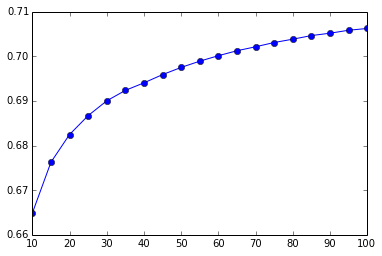

In [298]:
plt.plot(res.trees, res.score, marker='o')

In [316]:
gb30 = GradientBoostingClassifier(n_estimators=30, learning_rate=lr, verbose=False, random_state=RND)
gb30.fit(features_selected, target)
pred = gb30.predict_proba(features_selected)[:, 1]
score30 = roc_auc_score(target, pred)
score30

0.70020888166115025

In [328]:
def sigmoid(x):
    return 1.0/(1 + np.exp(-x))

def getLL(clf, X, y):
    return [log_loss(y, sigmoid(y_pred)) for i, y_pred in enumerate(clf.staged_decision_function(X))]

def getAucRoc(clf, X, y):
    return roc_auc_score(y, clf.predict_proba(X)[:, 1])   

In [331]:
X_train, X_test, y_train, y_test = train_test_split(features_selected, target, test_size=0.7, random_state=RND)

In [346]:
rate = 0.1

ar_train = []
ar_test = []
axis_x = range(10, 301, 10)

for t in axis_x:
    gb = GradientBoostingClassifier(n_estimators=t, learning_rate=rate, verbose=False, random_state=RND)
    gb.fit(X_train, y_train)
    
#     test_loss = getLL(gb, X_test, y_test))
#     train_loss = getLL(gb, X_train, y_train))
    
#     plt.figure()
#     plt.plot(test_loss, 'r', linewidth=2)
#     plt.plot(train_loss, 'g', linewidth=2)
#     plt.legend(['test', 'train'])
#     plt.title("LOG LOSS")
#     plt.show()
    
    ar_train.append(getAucRoc(gb, X_train, y_train))
    ar_test.append(getAucRoc(gb, X_test, y_test))
    print t

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300


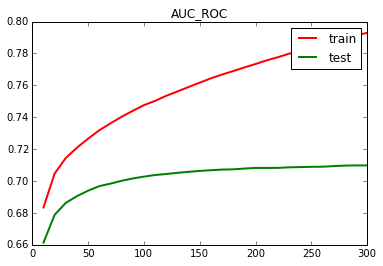

In [347]:
plt.figure()
plt.plot(axis_x, ar_train, 'r', linewidth=2)
plt.plot(axis_x, ar_test, 'g', linewidth=2)
plt.legend(['train', 'test'])
plt.title("AUC_ROC")
plt.show()

In [353]:
auc_roc = pd.DataFrame({'trees':axis_x, 'train':ar_train, 'test':ar_test})
auc_roc

,test,train,trees
0,0.661371,0.683418,10
1,0.678836,0.704714,20
2,0.686286,0.714466,30
3,0.690529,0.720924,40
4,0.693951,0.726593,50
5,0.696804,0.731836,60
6,0.698360,0.736172,70
7,0.700144,0.740281,80
8,0.701610,0.744042,90
9,0.702751,0.747605,100


## Отчет 1
# 1
#### Какие признаки имеют пропуски среди своих значений? 

In [325]:
partial

first_blood_time               77677
first_blood_team               77677
first_blood_player1            77677
first_blood_player2            53243
radiant_bottle_time            81539
radiant_courier_time           96538
radiant_flying_courier_time    69751
radiant_first_ward_time        95394
dire_bottle_time               81087
dire_courier_time              96554
dire_flying_courier_time       71132
dire_first_ward_time           95404
dtype: int64

#### Что могут означать пропуски в этих признаках (ответьте на этот вопрос для двух любых признаков)?
Пропуски связаны с игровыми событиями, которые могли не случиться (и не случились!)
в первые 5 минут игры (а может и за всю игру) - покупки разных вещей и раннее убийство одного из игроков.

# 2
##### Как называется столбец, содержащий целевую переменную?
radiant_win

# 3
#### Как долго проводилась кросс-валидация для градиентного бустинга с 30 деревьями?  Какое качество при этом получилось?

In [320]:
print "Time:", r30.time.tolist()[0], "AUC_ROC:", score30

Time: 0 days 00:02:41.873910 AUC_ROC: 0.700208881661


# 4
#### Имеет ли смысл использовать больше 30 деревьев в градиентном бустинге?
Градиентный бустинг может переобучаться, поэтому в любом случае бесконечно наращивать кол-во деревьев не стоит. Важно иметь метрику качества и понимать как увеличение числа деревьев сказывается на нем. Из таблицы и графика auc_roc видно что прирост качества обучения на тестовой выборке идет на сотые доли процента при кол-ве деревьев >80. Думаю в этой задаче в место увеличения числа деревьев имеет смысл попробовать найти другие полезные признаки.

#### Что бы вы предложили делать, чтобы ускорить его обучение при увеличении количества деревьев?
Ограничивать глубину деревьев, использовать меньшие подвыборки в обучающих данных и признаках в процессе построения деревьев..

# Часть 2

In [2]:
import pandas as pd
import numpy as np

import time
import datetime

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.grid_search import GridSearchCV
from scipy.sparse import hstack, coo_matrix
    
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def sigmoid(x):
    return 1.0/(1 + np.exp(-x))

def getLL(clf, X, y):
    return [log_loss(y, sigmoid(y_pred)) for i, y_pred in enumerate(clf.staged_decision_function(X))]

def getAucRoc(clf, X, y):
    return roc_auc_score(y, clf.predict_proba(X)[:, 1]) 

In [3]:
time.time?

In [3]:
features_all = pd.read_csv('features.csv', index_col='match_id')
features_all.head()

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,...,4,2,2,-52,2874,1,1796,0,51,0
1,1430220345,0,42,4,1188,1033,9,0,1,12,...,4,3,1,-5,2463,1,1974,0,63,1
2,1430227081,7,33,4,1319,1270,22,0,0,12,...,4,3,1,13,2130,0,0,1830,0,63
3,1430263531,1,29,4,1779,1056,14,0,0,5,...,4,2,0,27,1459,0,1920,2047,50,63
4,1430282290,7,13,4,1431,1090,8,1,0,8,...,3,3,0,-16,2449,0,4,1974,3,63


In [4]:
target = features_all['radiant_win']

In [5]:
features_test = pd.read_csv('features_test.csv', index_col='match_id')
features_list = features_test.columns.tolist()

In [6]:
features_selected = features_all[features_list]
features_selected.head(10)

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,...,0,35,103,-84,221,3,4,2,2,-52
1,1430220345,0,42,4,1188,1033,9,0,1,12,...,0,-20,149,-84,195,5,4,3,1,-5
2,1430227081,7,33,4,1319,1270,22,0,0,12,...,1,-39,45,-77,221,3,4,3,1,13
3,1430263531,1,29,4,1779,1056,14,0,0,5,...,0,-30,124,-80,184,0,4,2,0,27
4,1430282290,7,13,4,1431,1090,8,1,0,8,...,0,46,182,-80,225,6,3,3,0,-16
5,1430284186,1,11,5,1961,1461,19,0,1,6,...,1,-27,2,-86,212,4,4,4,0,-43
8,1430293701,1,8,3,967,1136,7,1,0,8,...,2,-35,6,-86,182,3,6,3,0,10
9,1430299335,7,35,5,2117,1252,16,0,0,6,...,1,26,119,-61,NaN,2,3,4,0,-15
11,1430308974,1,17,5,1527,906,10,0,1,7,...,1,9,NaN,-84,226,1,3,4,0,26


In [7]:
features_count = features_selected.count()
max_filled = features_count.max()
partial = features_count[features_count < max_filled]

In [10]:
features_selected.fillna(0, inplace=True)
features_test.fillna(0, inplace=True)

In [ ]:
totalN = len(target)
RND = 42
def train(X):
    res = pd.DataFrame(columns=['C', 'score', 'time'])  
    for c in np.power(10.0, np.arange(-5, 6)):
        clf = LogisticRegression(C=c, penalty='l2', random_state=RND)
        kf = KFold(totalN, n_folds=5, shuffle=True, random_state=RND)
        start_time = datetime.datetime.now()
        score = cross_val_score(clf, X, target, cv=kf, scoring='roc_auc')
        end_time = datetime.datetime.now() - start_time
        res = res.append({'C': c, 'score': score.mean(), 'time':end_time}, ignore_index=True)
        print end_time, score.mean(), c  
    return res.ix[res.score.idxmax()]

def run(label, X):
    res = train(X)
    print label, "best params:\n", res
    lg = LogisticRegression(C=res.C, penalty='l2', random_state=RND)
    lg.fit(X, target)
    score = getAucRoc(lg, X, target)
    print label, "score:", score
    return (score, res, lg)

# 1

In [229]:
features_scaled = StandardScaler().fit_transform(features_selected)
res_scalled = run("scalled", features_scaled)

0:00:04.107615 0.695161681227 1e-05
0:00:05.916374 0.711357748203 0.0001
0:00:11.702627 0.71636353888 0.001
0:00:15.087472 0.716550270785 0.01
0:00:14.053326 0.716527152902 0.1
0:00:12.339035 0.716522605658 1.0
0:00:12.811199 0.716522287837 10.0
0:00:12.238492 0.716522295257 100.0
0:00:12.763530 0.716522322797 1000.0
0:00:14.505015 0.716522328092 10000.0
0:00:12.680819 0.716522328092 100000.0
scalled best params:
C                          0.01
score                   0.71655
time     0 days 00:00:15.087472
Name: 3, dtype: object
scalled score: 0.717981741817


# 2

In [231]:
hero_cols = sum([["r%i_hero" % i, "d%i_hero" % i] for i in range(1,6)], [])
banned_cols = hero_cols + ["lobby_type"]

In [232]:
features_dropped = features_selected.drop(banned_cols, axis=1)
features_dropped = StandardScaler().fit_transform(features_dropped)
res_dropped = run("dropped", features_dropped)

0:00:04.879200 0.695100187107 1e-05
0:00:05.876823 0.711339145863 0.0001
0:00:08.448575 0.716375799908 0.001
0:00:10.800741 0.716559386445 0.01
0:00:11.504361 0.716534239287 0.1
0:00:10.633027 0.71653036557 1.0
0:00:12.220399 0.716529971503 10.0
0:00:10.772182 0.716529889947 100.0
0:00:10.587814 0.716529888885 1000.0
0:00:10.652103 0.71652988359 10000.0
0:00:11.157362 0.71652988359 100000.0
dropped best params:
C                          0.01
score                  0.716559
time     0 days 00:00:10.800741
Name: 3, dtype: object
dropped score: 0.717840770686


In [273]:
print "dropped better thand scalled: %.10f" % (res_dropped[1].score - res_scalled[1].score)

dropped better thand scalled: 0.0000091157


# 3

In [233]:
heroes = features_selected[hero_cols]

In [234]:
hero_uniq = np.unique(heroes.values)
print "Uniq heroes count:", hero_uniq.size

Uniq heroes count: 108


# 4

In [235]:
hero2id = dict(zip(hero_uniq, range(hero_uniq.size)))
def convertHeroes(X):
    res = np.zeros((X.shape[0], hero_uniq.size))
    for i, match_id in enumerate(X.index):
        for p in xrange(5):
            res[i, hero2id[X.ix[match_id, 'r%d_hero' % (p+1)]]] = 1
            res[i, hero2id[X.ix[match_id, 'd%d_hero' % (p+1)]]] = -1
    return res

In [236]:
features_rich = hstack([coo_matrix(features_dropped), coo_matrix(convertHeroes(features_selected))])

# 5

In [237]:
res_rich = run("rich", features_rich)

0:00:04.608646 0.699216216817 1e-05
0:00:06.653633 0.725071498503 0.0001
0:00:13.988120 0.746334151101 0.001
0:00:17.247907 0.751737730574 0.01
0:00:23.443300 0.751947344966 0.1
0:00:24.701176 0.751927559964 1.0
0:00:24.772272 0.751925225665 10.0
0:00:24.935716 0.75192470544 100.0
0:00:24.288190 0.751924949111 1000.0
0:00:24.311128 0.751924759521 10000.0
0:00:24.211255 0.751924690612 100000.0
rich best params:
C                           0.1
score                  0.751947
time     0 days 00:00:23.443300
Name: 4, dtype: object
rich score: 0.754446947008


# 6

In [238]:
test_heroes = features_test[hero_cols]
test_heroes_uniq = np.unique(test_heroes.values)
assert((test_heroes_uniq == hero_uniq).all())

In [251]:
# над тестовыми данными нужны все те же махимнации по нормализации! и удалении! и добавлению признаков!
test_dropped = features_test.drop(banned_cols, axis=1)
test_scalled = StandardScaler().fit_transform(test_dropped)
test_rich = hstack([coo_matrix(test_scalled), coo_matrix(convertHeroes(features_test))])

In [260]:
test_answers = res_rich[2].predict_proba(test_rich)[:, 1]
assert(test_answers.min() > 0 and test_answers.max() < 1)
test_answers

array([ 0.82466035,  0.75717036,  0.18778809, ...,  0.23399709,
        0.62470369,  0.42710208])

In [261]:
print "Min:", test_answers.min(), "Max:", test_answers.max()

Min: 0.00858060489119 Max: 0.996459223437


# Отчет 2
# 1
#### Какое качество получилось у логистической регрессии над всеми исходными признаками? Как оно соотносится с качеством градиентного бустинга? Чем вы можете объяснить эту разницу? Быстрее ли работает логистическая регрессия по сравнению с градиентным бустингом?

In [276]:
print "Time:", res_scalled[1].time, "AUC_ROC:", res_scalled[1].score

Time: 0 days 00:00:15.087472 AUC_ROC: 0.716550270785


У бустинга было: Time: 0 days 00:02:41.873910 AUC_ROC: 0.700208881661, медленнее, и хуже по качеству. Лучшее качество линейной регрессии думаю связано с пропусками в данных, мы использовали 0, что позволяет игнорировать такие значения в предсказании, в то врямя как деревья все-таки настраиваются на них.

# 2
#### Как влияет на качество логистической регрессии удаление категориальных признаков (укажите новое значение метрики качества)? Чем вы можете объяснить это изменение?

In [278]:
print "AUC_ROC:", res_dropped[1].score
print "dropped better thand scalled: %.10f" % (res_dropped[1].score - res_scalled[1].score)

AUC_ROC: 0.716559386445
dropped better thand scalled: 0.0000091157


Качество чуть заметно улучшилось на кросс-валидации, эти данные являют шумовыми и не несут полезного сигнала для обучения.

# 3
##### Сколько различных идентификаторов героев существует в данной игре?

In [279]:
print "Uniq heroes count:", hero_uniq.size

Uniq heroes count: 108


# 4
#### Какое получилось качество при добавлении "мешка слов" по героям? Улучшилось ли оно по сравнению с предыдущим вариантом? Чем вы можете это объяснить?

In [284]:
print "AUC_ROC:", res_rich[1].score
print "riched better thand dropped: %.10f" % (res_rich[1].score - res_dropped[1].score)

AUC_ROC: 0.751947344966
riched better thand dropped: 0.0353879585


Качество улучшилось на 3%, мы правльно подготовили данные, получили понятный, а главное полезныей, для модели фактор

# 5
#### Какое минимальное и максимальное значение прогноза на тестовой выборке получилось у лучшего из алгоритмов?

In [280]:
print "Min:", test_answers.min(), "Max:", test_answers.max()

Min: 0.00858060489119 Max: 0.996459223437
